In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Drop less useful or too sparse columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [ ]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2


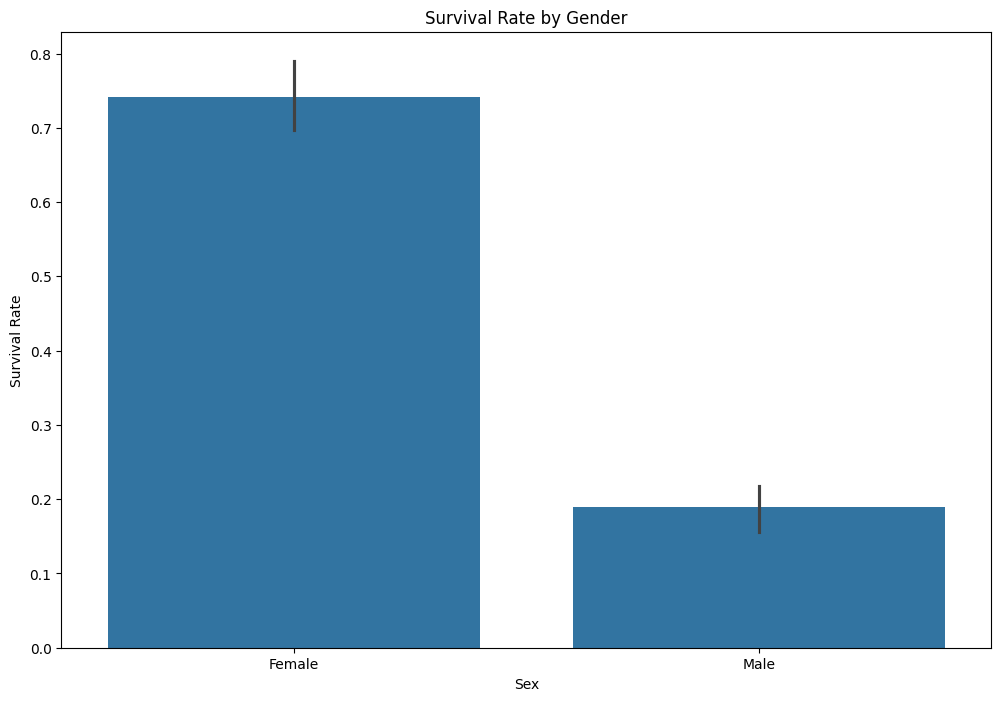

In [ ]:
plt.figure(figsize=(12, 8))

# 1. Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Survival Rate')
plt.show()


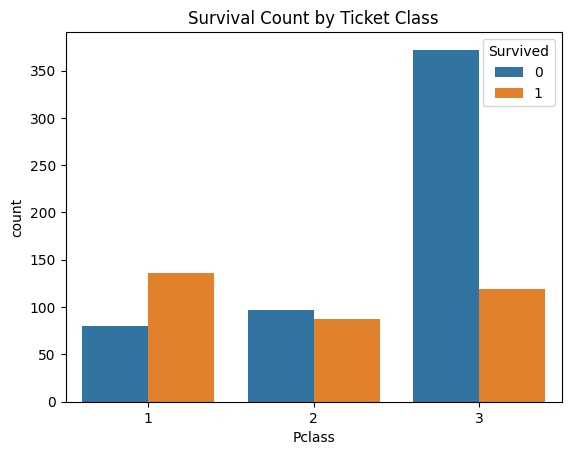

In [ ]:
# 2. Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Ticket Class')
plt.legend(title='Survived')
plt.show()


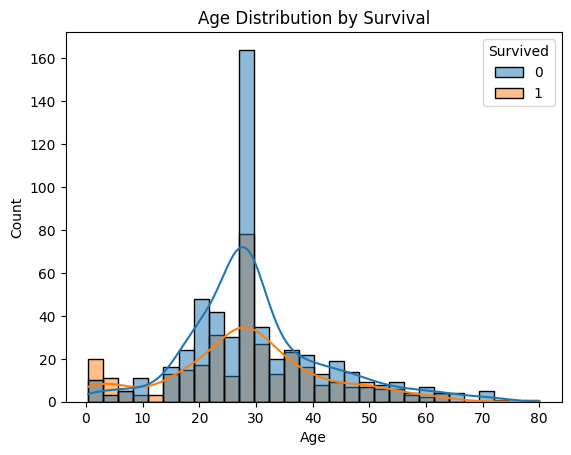

In [ ]:
# 3. Age distribution of survivors vs non-survivors
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()


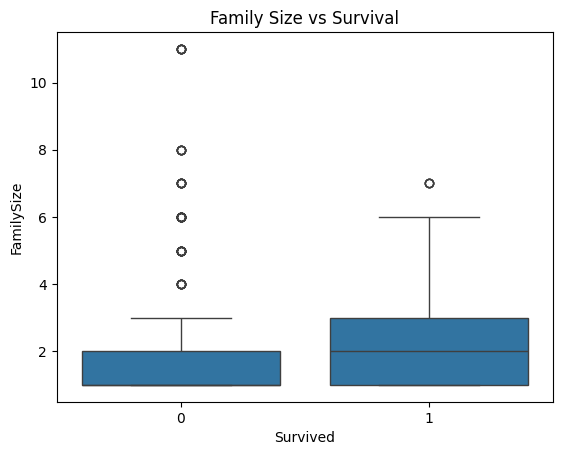

In [ ]:
# 4. Family size impact
sns.boxplot(data=df, x='Survived', y='FamilySize')
plt.title('Family Size vs Survival')
plt.show()

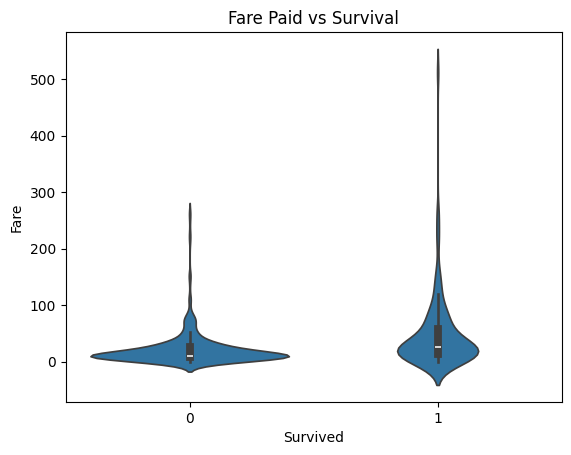

In [ ]:
# 5. Fare vs Survival
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare Paid vs Survival')
plt.show()

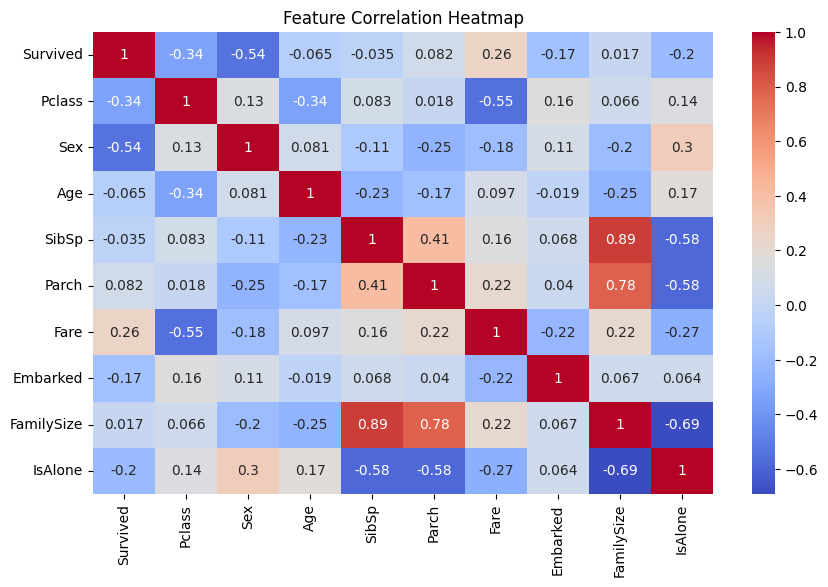

In [ ]:
# 6. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


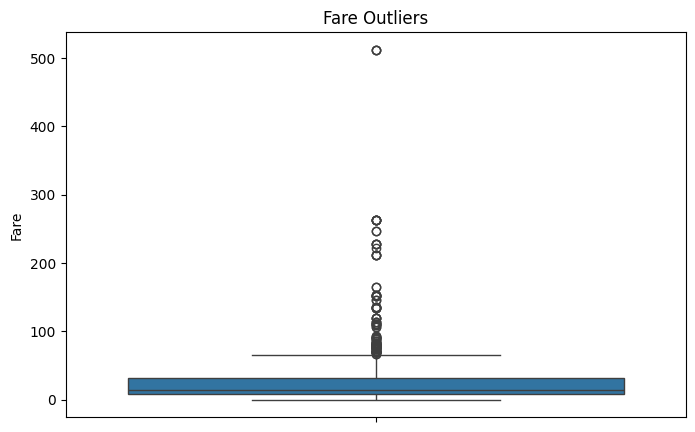

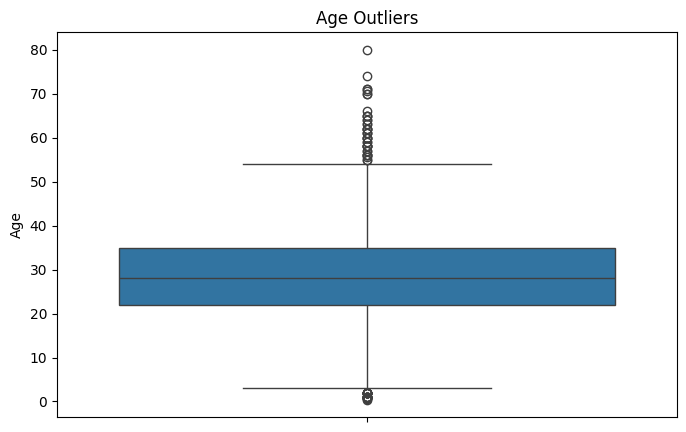

In [ ]:
#Outlier
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Fare
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Fare'])
plt.title('Fare Outliers')
plt.show()

# Boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Age'])
plt.title('Age Outliers')
plt.show()


In [ ]:
#Remove Outliers Using IQR Method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply outlier removal to both Age and Fare
df_cleaned = remove_outliers_iqr(df, 'Age')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Fare')

print("Original dataset shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original dataset shape: (891, 10)
After outlier removal: (718, 10)


In [ ]:
#Random Forest Classifier
# Define features and target from the cleaned data
X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)


In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" Accuracy Score after Outlier Removal:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy Score after Outlier Removal: 0.7638888888888888

Confusion Matrix:
 [[76 19]
 [15 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        95
           1       0.64      0.69      0.67        49

    accuracy                           0.76       144
   macro avg       0.74      0.75      0.74       144
weighted avg       0.77      0.76      0.77       144



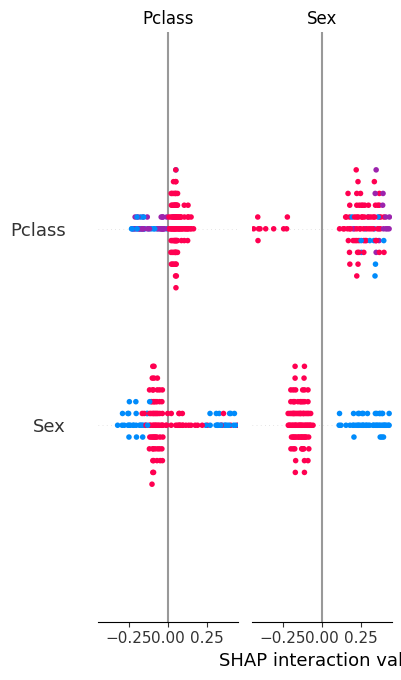

In [ ]:
#Feature Importance with SHAP
import shap

# New universal way with SHAP > 0.40
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)



In [ ]:
#Model Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Store models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7778
SVM Accuracy: 0.6875
Random Forest Accuracy: 0.7639


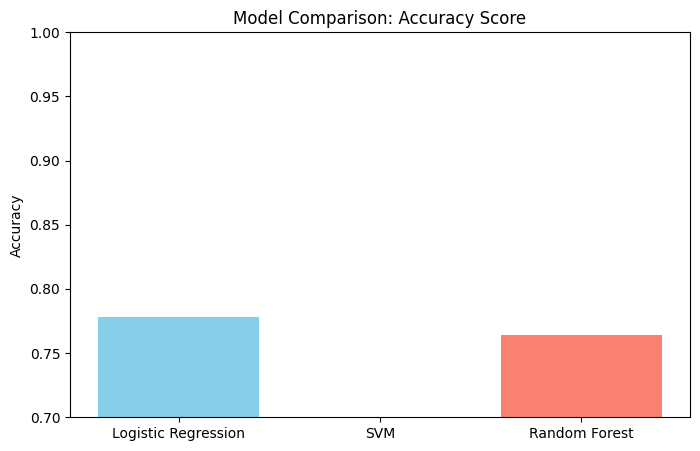

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Score')
plt.ylim(0.7, 1.0)
plt.show()
